- Multiple regression suffers from multicollinearity, autocorrelation, heteroskedasticity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv('Advertising.csv')
df = df_main.copy()

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [4]:
df.duplicated().sum()

0

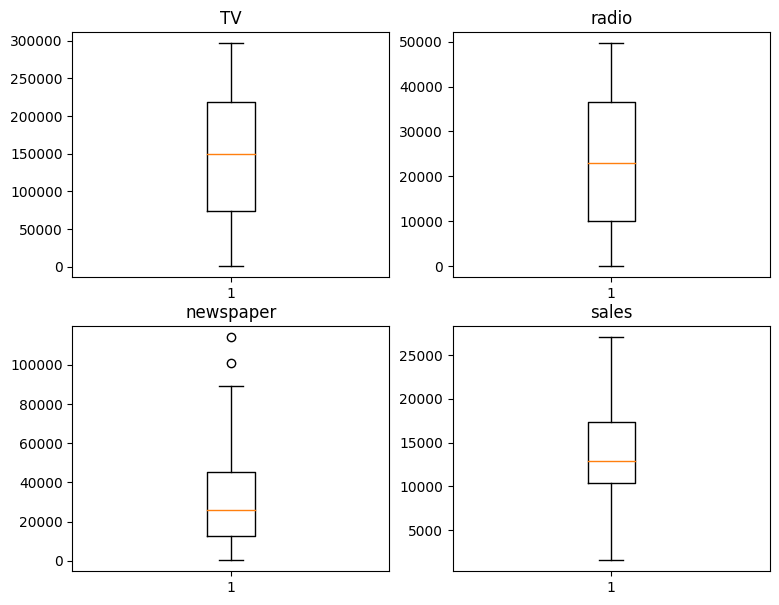

In [5]:
plt.figure(figsize=(9,7))

i = 1
for col in df.columns:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
    
plt.show()

In [22]:
Q1=df['newspaper'].quantile(0.25)
Q1=df['newspaper'].quantile(0.5)
Q3=df['newspaper'].quantile(0.75)

In [23]:
lb = Q1 - (1.5)*(Q3-Q1)
ub = Q3 + (1.5)*(Q3-Q1)
print(lb, ub)

-3275.0 74125.0


In [24]:
outliers = df[(df['newspaper']<lb) | (df['newspaper']>ub)]
outliers

,TV,radio,newspaper,sales
5,8700,48900,75000,7200
16,67800,36600,114000,12500
75,16900,43700,89400,8700
101,296400,36300,100900,23800
118,125700,36900,79200,15900
124,229500,32300,74200,19700
141,193700,35400,75600,19200
165,234500,3400,84800,11900


In [25]:
outliers.index

Int64Index([5, 16, 75, 101, 118, 124, 141, 165], dtype='int64')

In [27]:
df.drop(outliers.index, inplace =True)

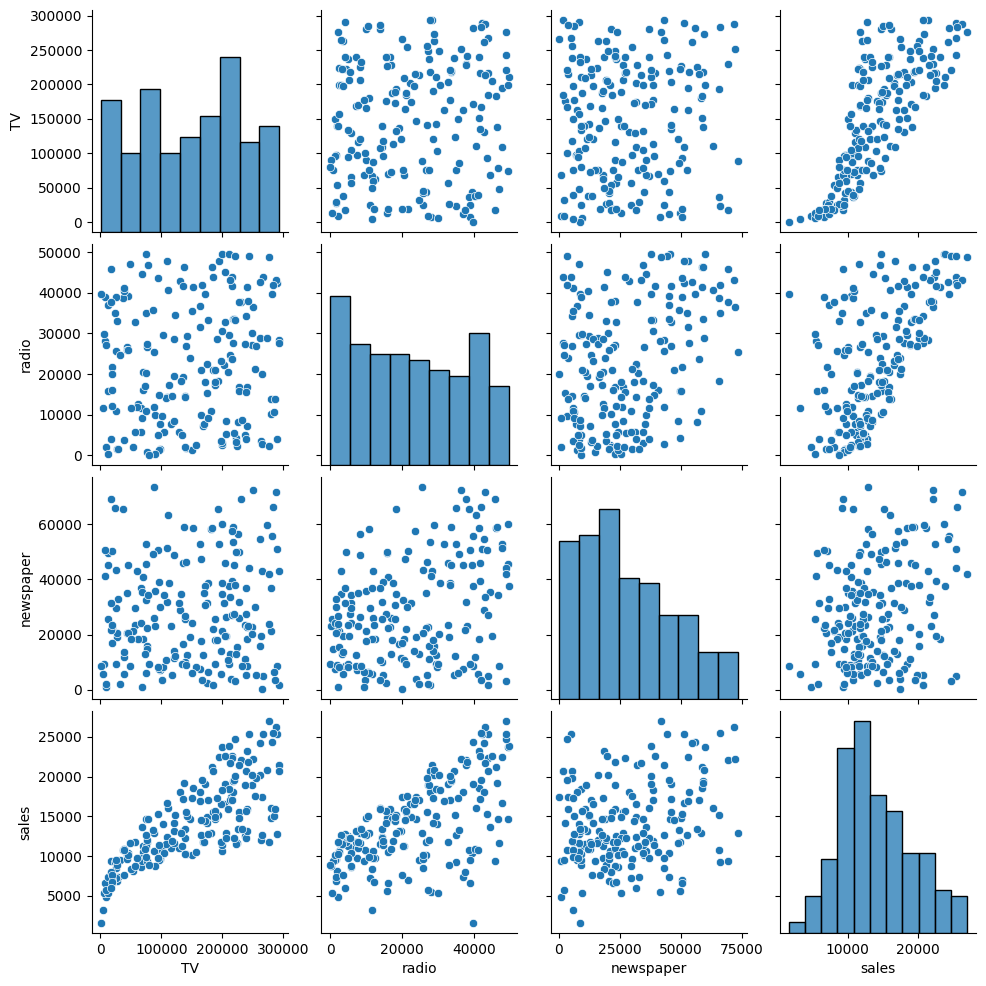

In [39]:
import seaborn as sns

sns.pairplot(df)
plt.show()

### TV vs Sales 

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [37]:
X = df[['TV']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
cvs = cross_val_score(model, X,y)

print('Intercept:',model.intercept_, '\nCoefficient:', model.coef_, '\nTrain score:',train_score,
     '\nTest score:',test_score, '\nCross validation score:', cvs.mean())

Intercept: 7118.820754730514 
Coefficient: [0.04763985] 
Train score: 0.5955914007650336 
Test score: 0.6554014309698167 
Cross validation score: 0.587027960400881


$$Model: sales = 0.048*TV + 7118.82$$

###  Radio vs Sales

In [41]:
X = df[['radio']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
cvs = cross_val_score(model, X,y)

print('Intercept:',model.intercept_, '\nCoefficient:', model.coef_, '\nTrain score:',train_score,
     '\nTest score:',test_score, '\nCross validation score:', cvs.mean())

Intercept: 9053.58256121819 
Coefficient: [0.20644102] 
Train score: 0.34939950140634857 
Test score: 0.42061289370252986 
Cross validation score: 0.3325463622211978



$$Model: sales = 0.206*TV + 9053.58$$


### Newspaper vs Sales 

In [42]:
X = df[['newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
cvs = cross_val_score(model, X,y)

print('Intercept:',model.intercept_, '\nCoefficient:', model.coef_, '\nTrain score:',train_score,
     '\nTest score:',test_score, '\nCross validation score:', cvs.mean())

Intercept: 12182.505608942141 
Coefficient: [0.06347463] 
Train score: 0.053182590932600915 
Test score: 0.10809349468126384 
Cross validation score: 0.03430799419695554


- From the score we got, we can say that newspaper is contributing/effecting least on the sales, we can also prove it further


$$Model: sales = 0.063*TV + 12182.50$$


### TV, radio & newspaper vs sales 

In [45]:
X = df.drop('sales', axis = 1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
cvs = cross_val_score(model, X,y)

print('Intercept:',model.intercept_, '\nCoefficient:', model.coef_, '\nTrain score:',train_score,
     '\nTest score:',test_score, '\nCross validation score:', cvs.mean())

Intercept: 2815.8034428645933 
Coefficient: [0.04554553 0.18878772 0.00590194] 
Train score: 0.8938746980126064 
Test score: 0.9358468904305733 
Cross validation score: 0.8904029769648446


$$Model: sales = 0.045*TV + 0.189*radio + 0.005*newspaper$$

- In the model the coefficient of newspaper is negligible i.e, the value of sales has least effect with the spend on newspaper

### 2 variables at a time -- TV & radio vs Sales 

In [43]:
X = df[['TV', 'radio']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
cvs = cross_val_score(model, X,y)

print('Intercept:',model.intercept_, '\nCoefficient:', model.coef_, '\nTrain score:',train_score,
     '\nTest score:',test_score, '\nCross validation score:', cvs.mean())

Intercept: 2915.6558219066064 
Coefficient: [0.04561435 0.19095339] 
Train score: 0.893455432183005 
Test score: 0.9350730269741631 
Cross validation score: 0.8906357516081732



$$Model: sales = 0.045*TV + 0.191*radio + 7118.82$$


In [53]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.083063,0.071013,0.779720
radio,0.083063,1.000000,0.335589,0.604741
newspaper,0.071013,0.335589,1.000000,0.255265
sales,0.779720,0.604741,0.255265,1.000000


- The correlation between the variable newspaper and sales is not so great having least corr
- Tv has the higher correlation with sales

In [55]:
df.drop('sales', axis=1).corr()

,TV,radio,newspaper
TV,1.000000,0.083063,0.071013
radio,0.083063,1.000000,0.335589
newspaper,0.071013,0.335589,1.000000


- since no independent variable is having a corr value, of >0.5 with another independent variable, there is no colinearity problem

In [67]:
#to extract a particular value - say rsquared
res = smf.ols('sales~ TV+radio+newspaper', data=df).fit().rsquared
res

0.9020425182403415

Variance Inflation Factor: $$VIF = \frac{1}{1-R^{2}}$$
- If the VIF of any variable is >4 then that variable has a high correlation with other independent variables and that particular variable should be dropped

In [68]:
#check the VIF of tv for TV influence on radio and newspaper
r2_tv = smf.ols('TV~ radio+newspaper', data=df).fit().rsquared
vif_tv = 1/(1-r2_tv)
vif_tv

1.009078206968809

In [69]:
r2_radio = smf.ols('radio ~TV+newspaper', data=df).fit().rsquared
vif_radio = 1/(1-r2_radio)
vif_radio

1.1314088529066684

In [70]:
r2_radio = smf.ols('newspaper ~TV+radio', data=df).fit().rsquared
vif_radio = 1/(1-r2_radio)
vif_radio

1.1292974766336996

- In the choosen dataset, no independent variable is influencing other independent variable

### AV plot (Added variable plot): 

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


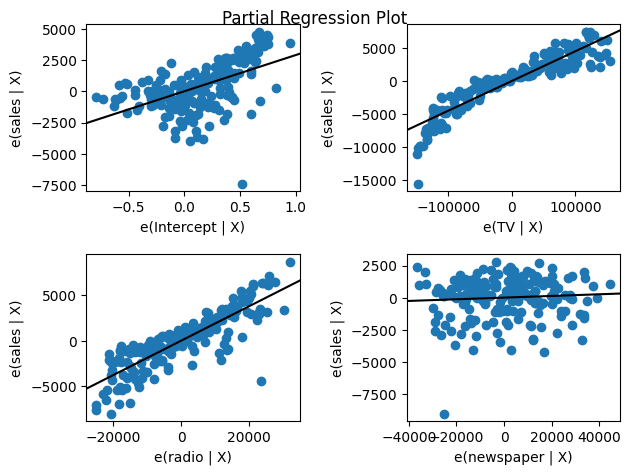

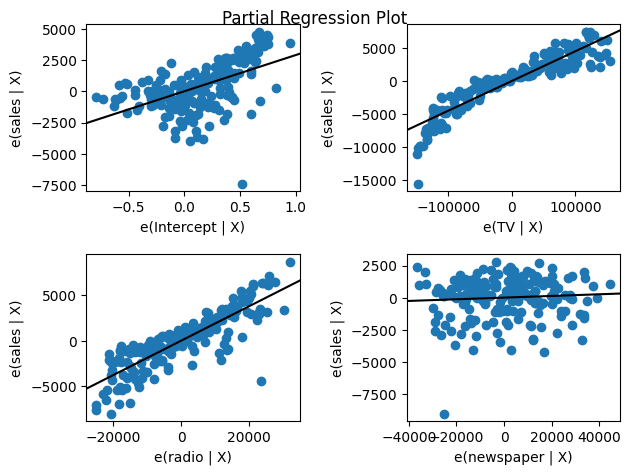

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

res = smf.ols('sales~ TV+radio+newspaper', data=df).fit()
sm.graphics.plot_partregress_grid(res)

### Checking contribution of 3 variables to sales 

In [66]:
import statsmodels.formula.api as smf

res = smf.ols('sales~ TV+radio+newspaper', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     577.1
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.50e-94
Time:                        14:46:18   Log-Likelihood:                -1692.0
No. Observations:                 192   AIC:                             3392.
Df Residuals:                     188   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2896.1675    312.517      9.267      0.000    2279.677    3512.658
TV             0.0448      0.001     31.991      0.000       0.042       0.048
radio          0.1891      0.009     22.075      0.000       0.172       0.206
newspaper      0.0065      0.007      0.961      0.338      -0.007       0.020
==============================================================================
Omnibus:                       61.537   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.584
Skew:                          -1.348   Prob(JB):                     5.51e-38
Kurtosis:                       6.766   Cond. No.                     4.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The summary of ols method from api is used to get the important statistical values as a table
- It initially mentions the dependent variable i.e, sales
- The model used is ols (ordinary least squares), and the method is least squares
- It also displays the R2 and adjusted R2
- It performs the t-test to either accept or reject the null hypothesis, where the significance level is considered to be 0.05 if the probablity of any coefficient is >0.05 then we gonna reject the null hypothesis and conclude that that particular variable has no effect or negligible effect on the dependent variable



- When we say an independent variable has high correlation with other independent variables, it means that particular variable that has high corr with the other and can be predicted using the variable with which it has high corr, making the high corr variable useless from the data

**Conclusion:** The amount to be spent on newpaper can be spent on radio to maximise the sales